# Image rotation with CNN

this is a search and development project to do on the weekends.


my main resourse is this blog post: https://d4nst.github.io/2017/01/12/image-orientation/



In [1]:
import os

targetUrl = 'datasets/streetview'
targetUrlTestData = 'datasets/streetview/testdata'

gmap_images_url = "http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/images"
DEBUG = False

def dpr(output):
    if (DEBUG):
        print(output)

## Rotate images
#### Get images

In [2]:
import math
# generate filenames
# example 000005_3.jpg
# the postfix can be a number between 0 and 5
# the first part is a simple xml padded to 6 char: '{0:0>6}'.format('132')
fileNames = []
max = 444
for i in range(1, math.floor(max/6)+1):
    baseName = '{0:0>6}'.format(i);
    for postfix in range(6):
        fileNames.append(baseName + "_" + str(postfix) + ".jpg");


In [3]:
fileNames[0:10]

['000001_0.jpg',
 '000001_1.jpg',
 '000001_2.jpg',
 '000001_3.jpg',
 '000001_4.jpg',
 '000001_5.jpg',
 '000002_0.jpg',
 '000002_1.jpg',
 '000002_2.jpg',
 '000002_3.jpg']

### actually download images

In [6]:
import urllib.request

test_train_split = 8
counter = 0

for filename in fileNames:
    print('downloading {0}\n'.format(filename))
    counter += 1
    if (counter % 8 == 0):
        targetDir = targetUrlTestData
    else:
        targetDir = targetUrl
    try:
         urllib.request.urlretrieve(gmap_images_url + '/' + filename, targetDir + '/' + filename)
    except TimeoutError:
        dpr("timeout error")
        continue


downloading 000001_0.jpg

downloading 000001_1.jpg

downloading 000001_2.jpg

downloading 000001_3.jpg

downloading 000001_4.jpg

downloading 000001_5.jpg

downloading 000002_0.jpg

downloading 000002_1.jpg

downloading 000002_2.jpg

downloading 000002_3.jpg

downloading 000002_4.jpg

downloading 000002_5.jpg

downloading 000003_0.jpg

downloading 000003_1.jpg

downloading 000003_2.jpg

downloading 000003_3.jpg

downloading 000003_4.jpg

downloading 000003_5.jpg

downloading 000004_0.jpg

downloading 000004_1.jpg

downloading 000004_2.jpg

downloading 000004_3.jpg

downloading 000004_4.jpg

downloading 000004_5.jpg

downloading 000005_0.jpg

downloading 000005_1.jpg

downloading 000005_2.jpg

downloading 000005_3.jpg

downloading 000005_4.jpg

downloading 000005_5.jpg

downloading 000006_0.jpg

downloading 000006_1.jpg

downloading 000006_2.jpg

downloading 000006_3.jpg

downloading 000006_4.jpg

downloading 000006_5.jpg

downloading 000007_0.jpg

downloading 000007_1.jpg

downloading 

downloading 000053_4.jpg

downloading 000053_5.jpg

downloading 000054_0.jpg

downloading 000054_1.jpg

downloading 000054_2.jpg

downloading 000054_3.jpg

downloading 000054_4.jpg

downloading 000054_5.jpg

downloading 000055_0.jpg

downloading 000055_1.jpg

downloading 000055_2.jpg

downloading 000055_3.jpg

downloading 000055_4.jpg

downloading 000055_5.jpg

downloading 000056_0.jpg

downloading 000056_1.jpg

downloading 000056_2.jpg

downloading 000056_3.jpg

downloading 000056_4.jpg

downloading 000056_5.jpg

downloading 000057_0.jpg

downloading 000057_1.jpg

downloading 000057_2.jpg

downloading 000057_3.jpg

downloading 000057_4.jpg

downloading 000057_5.jpg

downloading 000058_0.jpg

downloading 000058_1.jpg

downloading 000058_2.jpg

downloading 000058_3.jpg

downloading 000058_4.jpg

downloading 000058_5.jpg

downloading 000059_0.jpg

downloading 000059_1.jpg

downloading 000059_2.jpg

downloading 000059_3.jpg

downloading 000059_4.jpg

downloading 000059_5.jpg

downloading 

### rotate image in 3 orientation, copy and add some label

labels: https://www.impulseadventure.com/photo/exif-orientation.html

- 1 top, 
- 8 left side, 
- 3 bottom, 
- 6 right side

prepend this label to the filename separted by a "#", eg. `1#000001_5.jpg`



In [7]:
import os
from PIL import Image

ORIENTATION_LABELS = { 'top': 1, 'left':  8, 'bottom': 3, 'right': 6 }


def rotateImage(orientation, fileName, labeledFileName, subdir):
    anglesForOrientation = { ORIENTATION_LABELS['top']: 0, 
                             ORIENTATION_LABELS['left']: 90, 
                             ORIENTATION_LABELS['bottom']: 180, 
                            ORIENTATION_LABELS['right']: 270 }
    
    if not orientation in anglesForOrientation.keys():
        raise Exception('Unknown orienation: ' + orientation)
    
    angle = anglesForOrientation[orientation]
    
    # crop the image to have equal sizes
    targetPath = os.path.join(subdir, labeledFileName)  
    img = Image.open(os.path.join(subdir, fileName))
    size = 0, 0, 1024, 1024
    img.crop(size).rotate(angle).save(targetPath)
                                  
#rotateImage(ORIENTATION_LABELS['bottom'], 1, 2, 3)

In [8]:
# first iterate them and add the appropriate label
import os


def isImage(file):
    return '.jpg' in file

def isProcessed(file):
    return '#' in file

def addLabelToFile(label, file):
    return '{label}#{file}'.format(label = label, file = file)


def rotateImages(fileName, subdir):
    for orientation in ORIENTATION_LABELS.values():
        labeledFileName = addLabelToFile(orientation, fileName)
        rotateImage(orientation, fileName, labeledFileName, subdir)


def processImages(directory):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if (not isImage(file)):
                continue
            if (isProcessed(file)):
                continue
            print ('Processing: {0}'.format(os.path.join(subdir, file)))
        
        
            # create the rotations
            rotateImages(file, subdir)
        
            # delete originals
            os.remove(os.path.join(subdir, file))
        

### Actually rotate and label images in the test and train directories

In [9]:
processImages(targetUrl)
processImages(targetUrlTestData)

Processing: datasets/streetview/000013_5.jpg
Processing: datasets/streetview/000028_3.jpg
Processing: datasets/streetview/000072_4.jpg
Processing: datasets/streetview/000037_4.jpg
Processing: datasets/streetview/000049_2.jpg
Processing: datasets/streetview/000017_1.jpg
Processing: datasets/streetview/000052_1.jpg
Processing: datasets/streetview/000074_2.jpg
Processing: datasets/streetview/000031_2.jpg
Processing: datasets/streetview/000050_3.jpg
Processing: datasets/streetview/000033_0.jpg
Processing: datasets/streetview/000033_1.jpg
Processing: datasets/streetview/000050_2.jpg
Processing: datasets/streetview/000015_2.jpg
Processing: datasets/streetview/000074_3.jpg
Processing: datasets/streetview/000017_0.jpg
Processing: datasets/streetview/000052_0.jpg
Processing: datasets/streetview/000049_3.jpg
Processing: datasets/streetview/000037_5.jpg
Processing: datasets/streetview/000028_2.jpg
Processing: datasets/streetview/000056_4.jpg
Processing: datasets/streetview/000013_4.jpg
Processing

Processing: datasets/streetview/000029_4.jpg
Processing: datasets/streetview/000071_1.jpg
Processing: datasets/streetview/000012_2.jpg
Processing: datasets/streetview/000057_2.jpg
Processing: datasets/streetview/000036_3.jpg
Processing: datasets/streetview/000073_3.jpg
Processing: datasets/streetview/000055_0.jpg
Processing: datasets/streetview/000010_0.jpg
Processing: datasets/streetview/000068_0.jpg
Processing: datasets/streetview/000030_5.jpg
Processing: datasets/streetview/000009_1.jpg
Processing: datasets/streetview/000014_4.jpg
Processing: datasets/streetview/000051_4.jpg
Processing: datasets/streetview/000021_0.jpg
Processing: datasets/streetview/000064_0.jpg
Processing: datasets/streetview/000042_3.jpg
Processing: datasets/streetview/000066_2.jpg
Processing: datasets/streetview/000023_2.jpg
Processing: datasets/streetview/000005_1.jpg
Processing: datasets/streetview/000040_1.jpg
Processing: datasets/streetview/000018_4.jpg
Processing: datasets/streetview/000060_4.jpg
Processing

Processing: datasets/streetview/000063_2.jpg
Processing: datasets/streetview/000045_1.jpg
Processing: datasets/streetview/000063_0.jpg
Processing: datasets/streetview/000026_0.jpg
Processing: datasets/streetview/000045_3.jpg
Processing: datasets/streetview/000024_2.jpg
Processing: datasets/streetview/000061_2.jpg
Processing: datasets/streetview/000047_1.jpg
Processing: datasets/streetview/000022_4.jpg
Processing: datasets/streetview/000067_4.jpg
Processing: datasets/streetview/000019_2.jpg
Processing: datasets/streetview/000006_5.jpg
Processing: datasets/streetview/000043_5.jpg
Processing: datasets/streetview/000006_4.jpg
Processing: datasets/streetview/000043_4.jpg
Processing: datasets/streetview/000022_5.jpg
Processing: datasets/streetview/000067_5.jpg
Processing: datasets/streetview/000047_0.jpg
Processing: datasets/streetview/000002_0.jpg
Processing: datasets/streetview/000024_3.jpg
Processing: datasets/streetview/000061_3.jpg
Processing: datasets/streetview/000045_2.jpg
Processing

# convert images into classified matrices before train / test split

Keras has a fit_generator where the first param is a generator to add datas on the fly (by batches)

https://keras.io/models/sequential/



In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras



import os
import numpy as np
from PIL import Image
import keras
import re


num_classes = 4


class trainDataGenerator:
    def __init__(self, image_src_path, batch_size=64):
        self.image_src_path = image_src_path
        self.batch_size = batch_size
        self.input_shape = (1024, 1024, 3)
        self.files = []
        self._getFilenames()
        dpr("src path: {}, number of images: {}".format(image_src_path, len(self.files)))
        self.curr_image_index = -1
        self.batch_X = False
        self.batch_y = False
        self.batch_index = -1

        
    def __iter__(self):
        return self

    def __next__(self):
        # create array to hold the images
        self.batch_X = np.zeros((self.batch_size,) + self.input_shape, dtype='float32')
        dpr("batch_X shape: {}".format(self.batch_X.shape))
        # create array to hold the labels
        self.batch_y = np.zeros(self.batch_size, dtype='int')
        dpr(self.curr_image_index)
        first_image_in_batch = self.curr_image_index + 1
        last_image_in_batch = first_image_in_batch + self.batch_size
        self.batch_index = -1

        self._processFiles(first_image_in_batch,  last_image_in_batch)
        dpr("batch_X shape: {}, batch_y shape: {}".format(self.batch_X.shape, self.batch_y.shape))
        dpr("batch_y: {}".format(self.batch_y))


        return self.batch_X, keras.utils.to_categorical(self.batch_y, num_classes)
    
    def _processFiles(self, first_image_in_batch, last_image_in_batch):
        dpr('first: {}, second: {}'.format(first_image_in_batch, last_image_in_batch))
        for i in range(first_image_in_batch, last_image_in_batch):
            try:
                file_name = self.files[i]
                self.curr_image_index = i
                img = Image.open(file_name)
                arr = np.array(img)
                # image as numpy array
                shape = arr.shape
                dpr('{image} has shape: {shape}'.format(image=file_name, shape=shape))
                # batch_X index is always between 0 and batch size, but index starts at the first image in batch.
                # when the batch is 4, first will be 0, then 4, then 8 

                self.batch_index += 1
                self.batch_X[self.batch_index] = arr
                
                # get the label
                found = re.search(r'([1,8,3,6])#.*?', file_name)

                label = found.group(1)
                dpr('label: {label}'.format(label=label))
                # convert label to categorical
                categs = {'1':0, '8': 1, '3': 2, '6': 3}
                
                
                self.batch_y[self.batch_index] = categs[label]
            
            except FileNotFoundError:
                raise StopIteration()
            except IndexError:
                raise StopIteration()
    
    def _getFilenames(self):
        for _, _, files in os.walk(self.image_src_path):
            for file in files:
                 if '.jpg' in file:
                    self.files.append(self.image_src_path + '/' + file)  
                            
                

Using TensorFlow backend.


In [11]:
keras.utils.to_categorical([3, 2, 1, 2, 3, 2], num_classes)

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [19]:
# train dat4
for x, y in trainDataGenerator(targetUrl, 20):
    print(x.shape, y.shape)

(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) (20, 4)
(20, 1024, 1024, 3) 

# classifier model definition

keras example for mnist classification: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


# number of convolutional filters to use
nb_filters = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)


# see the prev result
nb_train_samples, img_rows, img_cols, img_channels = (64, 1024, 1024, 3)
input_shape = (img_rows, img_cols, img_channels)


# model definition
model = Sequential()
model.add(Conv2D(8, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(16, (6, 6), activation='softmax'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the network

In [5]:
batch_size = 4
nb_epoch = 5

history = model.fit_generator(
    generator=trainDataGenerator(
       targetUrl, 
       batch_size
    ),
    steps_per_epoch=1,
    epochs=nb_epoch,
    validation_data=trainDataGenerator(
        targetUrlTestData, 
        4
    ),
    verbose=1,
    validation_steps=1
)

Epoch 1/5
1/1 [==============================] - 24s - loss: 1.3719 - acc: 0.0000e+00 - val_loss: 1.4820 - val_acc: 0.2500
Epoch 2/5
1/1 [==============================] - 28s - loss: 1.2983 - acc: 0.5000 - val_loss: 1.6231 - val_acc: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 24s - loss: 1.7732 - acc: 0.2500 - val_loss: 1.5502 - val_acc: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 23s - loss: 1.3211 - acc: 0.2500 - val_loss: 1.4675 - val_acc: 0.2500
Epoch 5/5
1/1 [==============================] - 23s - loss: 1.1454 - acc: 0.5000 - val_loss: 1.4101 - val_acc: 0.2500


src path: datasets/streetview, number of images: 1776
src path: datasets/streetview/testdata, number of images: 220


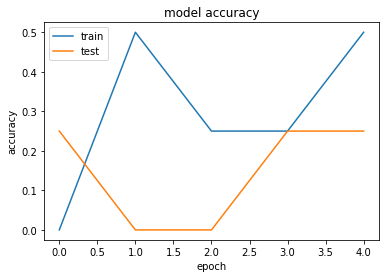

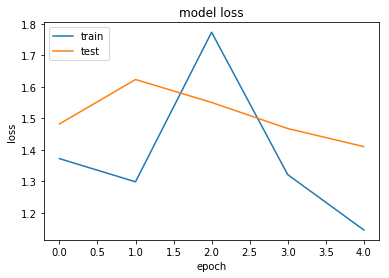

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Predict

In [59]:
test_image_names = [
'datasets/streetview/testdata/3#000004_5.jpg',
'datasets/streetview/testdata/6#000042_1.jpg',
'datasets/streetview/8#000074_3.jpg',
'datasets/streetview/1#000041_2.jpg',  
]

categs = {'1':0, '8': 1, '3': 2, '6': 3}

def displayResult(op):
    greatest = op[0][0]
    ind = 0
    for index, r in enumerate(op[0]):
        if r > greatest:
            greatest, ind = r, index
        
    categs = {'top (1)': 0, 'left (8)': 1, 'bottom (3)': 2, 'right (6)': 3}

    print(list(categs.keys())[ind])

def testPrediction(test_image_name):
    img = Image.open(test_image_name)
    img_arr = np.array(img)
    img_arr_4dim = np.expand_dims(img_arr, axis=0)

    plt.imshow(img)

    output = model.predict(img_arr_4dim)
    greater = 0
    displayResult(output)
    print(output, categs)



top (1)
[[ 0.30471835  0.23065434  0.17363815  0.29098919]] {'1': 0, '8': 1, '3': 2, '6': 3}


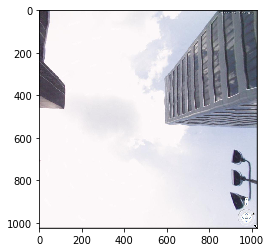

In [64]:
testPrediction('datasets/streetview/testdata/3#000004_5.jpg')

top (1)
[[ 0.30471835  0.23065434  0.17363815  0.29098919]] {'1': 0, '8': 1, '3': 2, '6': 3}


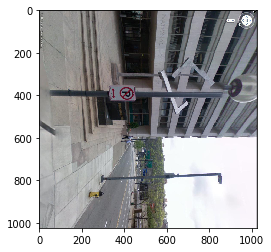

In [65]:
testPrediction('datasets/streetview/testdata/6#000042_1.jpg')



top (1)
[[ 0.30471835  0.23065434  0.17363815  0.29098919]] {'1': 0, '8': 1, '3': 2, '6': 3}


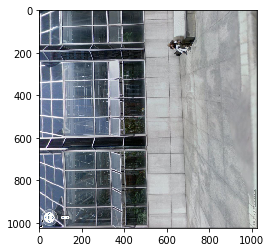

In [66]:
testPrediction('datasets/streetview/8#000074_3.jpg')

top (1)
[[ 0.30471835  0.23065434  0.17363815  0.29098919]] {'1': 0, '8': 1, '3': 2, '6': 3}


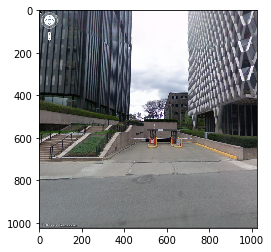

In [67]:
testPrediction('datasets/streetview/1#000041_2.jpg')